# IBM Applied Data Science Professional Certificate Capstone project at Coursera
### By Jens Greve
### January 23

## Opening a Mexcian restaurant in New York city

## Business problem description
The objective of this Capston project is to retrie local based data and analyze it in order to select the best locations in New York city to open a Mexican resturant. The project will use data science retriveing, analyzing and visualizatring methodolgies tought in the Course course.

Questions aimed to be answered im the report:
- In which jurisdictions of New York do people of hispanic origin live?
- Which neighbourhoods or boroughs have the largest number of Mexican resturants and/or the hights ratings / most likes?
- What is / are the best location(s) to open a Mexican restaurant in New York City? 

### Introduction
New York City is the largest city in US with 8.4 million people according to Wikipedia and with a wide and diverse range of ethnicities. It also has a large history of immigration and 48.6% of NY citizens are speakers of a non-English language according to https://datausa.io/. And New York Times has claimed that New York is the most diverse city in the world with 800 languages spoken in New York. So it has a long tradition of different ethnical restaurants.

This final project aims to analyze the availability of Mexican restaurants in New York and make some discussions of how the data could be used to find the best location for a Mexican in the area of New York city. Mexiacn restautants. The Mexican cuisine has been raising in popularity in USA for many years and US consumers for several years, while it has always been popular with people of hispanic origin.

So this project aims to analyze the ethnical demographics of the New York jurisdictions or boroughs and the availability and ranking of Mexican in boroughs to understand the competion and opportunity to open a Mexican resturant in New York.

### Data Required
In order to answer the above questions, data on New York City is required

- List of neighborhoods and boroughs of New York city
- Latitude and longitude of the neighbourhoods and boroughs
- Venue data of the restaurants
- Demographic data of ethnical origin by neighbourhood

### Data Sources
- New York City data ethnical orgin of New York will be obtained at this web site: https://en.wikipedia.org/wiki/Demographics_of_New_York_City

- New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

- All data related to locations and quality of Mexican restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

### Methodology
• Data will be scraped from a table from https://en.wikipedia.org/wiki/Demographics_of_New_York_Cit and cleaned, sorted and put into a dataframe

• Data will be collected from https://cocl.us/new_york_dataset and cleaned, sorted and processed into a dataframe.

• The data will be enriched with GPS corrdinates using the Python geocoder package

• FourSquare APIs will be used to locate all venues and then filtered by Mexican restaurants incl. their ratings, likes and tips and added to the dataframe.

• Venue data will be sorted based on sum, ranking and borough.

• Finally, the data will be visually assessed using graphing from Python libraries.



## Let's install the all required packages before we can import the libraries
I put this in a separate cell as it sometimes takes a long time to install

In [2]:
# Install folium package for map visualization
!conda install -c conda-forge folium=0.5.0 --yes

# Install geopy package for geo coordinates
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup # this module helps in web scrapping.

import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')  

Libraries imported.


## Define Foursquare with my Credentials and Version
## I am creating an additional account as Fourthsquare has a daily quota threshold

Go to your "App Settings" page on the developer console of Foursquare.com
Set the "Redirect URL" under "Web Addresses" to https://www.google.com
Paste and enter the following url in your web browser (replace YOUR_CLIENT_ID with your actual client id): https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com

This should redirect you to a google page requesting permission to make the connection.

Accept and then look at the url of your web browser (take note at the CODE part of the url to use in step 5)
It should look like https://www.google.com/?code=CODE

Copy the code value from the previous step.
Paste and enter the following into your web browser (replace placeholders with actual values): https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE.

When you paste the link , This should lead you to a page that gives you your access token.

How to get an access token
Go to your "App Settings" page on the developer console of Foursquare.com Set the "Redirect URL" under "Web Addresses" to https://www.google.com

Paste and enter the following into your web browser (replace YOUR_CLIENT_ID with your actual client id): https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com For Example

This should redirect you to a google page requesting permission to make the connection. Accept and then look at the url of your web browser (take note at the CODE part of the url to use in step 5). It should look like https://www.google.com/?code=CODE

Copy the code value from the previous step. Paste and enter the following into your web browser (replace placeholders with actual values): https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE. CODE is the code value copied from previous step. When you paste the link , This should lead you to a page that gives you your access token.

In [4]:
# mrgreve33
#CLIENT_ID = 'S1SX52JOFZXABRRIZ1SYNBBLQS2IAAWS5UGINAAMBEOMXVWQ' # your Foursquare ID
#CLIENT_SECRET = 'O3DPVZ4VBGPD31S4PGN3ZBEU3WOWJLXM4MX1EACOTW3TOY1G' # your Foursquare Secret
#ACCESS_TOKEN = '2DOWE1UNVX4VG5V3J0OF3JNNM1IAVAZW2BONCBVZAC3SWZD1' # your FourSquare Access Token
#VERSION = '20180605' # Foursquare API version

# mrgreve44
CLIENT_ID = 'PUZTXZLNLC0RR12U0OW25EKHRDIKDNSQRD4J3ZFGDJ1OP0PW' # your Foursquare ID
CLIENT_SECRET = '1KO3NJCPCLC3AIYXGCFNV2VORTKKCAMZQV3TMI4AXJ31P0OC' # your Foursquare Secret
ACCESS_TOKEN = 'LOGJL4SB0MAMTB2204VFQY3SKMYQUKNOS0XNPCJYMD1BSGSB' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version

# mrgreve22
#CLIENT_ID = 'WDZX3HZAQQ1YMODL2GCWEE4VFKPHXBVR3W1UWVYDGEFKZ21X' # your Foursquare ID
#CLIENT_SECRET = 'X3AZ0DXJ0APMBITVSDIFJAW1TDWPC1T1XQT2LKKSPYQFD0GW' # your Foursquare Secret
#ACCESS_TOKEN = '5QIWRA41DLTZFTI13MIATLBYSVNVKYXSC2S2XZIYDX2VFQK3' # your FourSquare Access Token
#VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PUZTXZLNLC0RR12U0OW25EKHRDIKDNSQRD4J3ZFGDJ1OP0PW
CLIENT_SECRET:1KO3NJCPCLC3AIYXGCFNV2VORTKKCAMZQV3TMI4AXJ31P0OC


## Now let's define the functions we are going to use later in this project

In [5]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_new_york_data(url):
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## Let's get demographic by ethnicity by borough for New York City
### Inspect HTML
Before moving forward, we need to understand the structure of the website we wish to scrape. 

We use the Chrome devtool by clicking right-clicking the element we wish to scrape and then hitting “Inspect”. 

We inspect the web page https://en.wikipedia.org/wiki/Demographics_of_New_York_City and can see the data is in a table.

### Get html data from web page

### Now get the right table on the page into a dataframe
The table does not have a class name or an ID, but we can capture all tables and use the index.

In [6]:
url = "https://en.wikipedia.org/wiki/Demographics_of_New_York_City"

dfs = pd.read_html(url)
df = dfs[5]
df

,Jurisdiction,Population2000census,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace,Unnamed: 8,%Catholic,% notaffiliated,%Jewish,%Protestant,Estimateof % notreporting
0,NaN,NaN,Race,Race,Race,Race,Race,Ethnicity,NaN,Religious groups,Religious groups,Religious groups,Religious groups,Religious groups
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8,NaN,37,4,15,8,33
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0,NaN,29,37,11,5,15
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2,NaN,37,11,20,9,19
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4,NaN,44,14,6,5,29
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1,NaN,60,11,8,5,14
6,NYC Total,8008278,44.7,26.6,9.8,14.0,4.9,27.0,NaN,37,17,13,6,24
7,NY State,18976457,67.9,15.9,5.5,7.5,3.1,15.1,NaN,42,20,9,10,16
8,USA,281421906,75.1,12.3,3.6,6.5,2.4,12.5,NaN,22,37,2,23,12
9,"Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ...","Source: 2000 Census[63] American Indian, Nativ..."


### It is a nested table, so we need to clean some rows and the columns we do not need.

In [7]:
# drop the first row from the nested table
# drop to state and country totals
df2 = df.drop(10)
df2 = df2.drop(9)
df2 = df2.drop(8)
df2 = df2.drop(7)
df2 = df2.drop(6)
df2 = df2.drop(0)

# We only need the ethnical - no by religion
df2 = df2[df2.columns[0:8]]

# Rename Jusridiction to Borough
df2 = df2.rename(columns={'Jurisdiction': 'Borough'})
df2 = df2.rename(columns={'Population2000census': 'Population'})

df2[["%Hispanic/Latinoof anyrace"]] = df2[["%Hispanic/Latinoof anyrace"]].apply(pd.to_numeric)
df2[["Population"]] = df2[["Population"]].apply(pd.to_numeric)

df2

,Borough,Population,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1


## Data analysis of demographic by ethnicity by borough
Our assumption is that people of hispanic or latin origin would be interested in a Mexican restaurants more than white, asian and afro americans.

So we are interested to see which boroughs have the highest number of hispanics, both percentage and total popultion.  

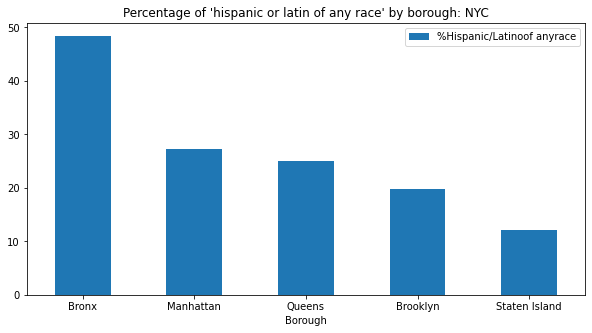

In [8]:
#Let's sort by descending to make the chart easier to read
df2 = df2.sort_values(by=['%Hispanic/Latinoof anyrace'], ascending=False)

ax = df2.plot.bar(x='Borough', y='%Hispanic/Latinoof anyrace', rot=0, title="Percentage of 'hispanic or latin of any race' by borough: NYC", figsize=(10,5), fontsize = 10, legend=True)

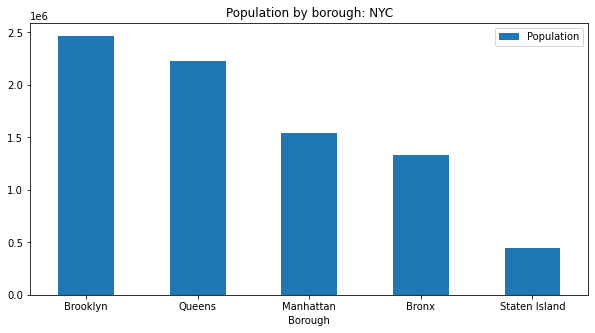

In [9]:
df2 = df2.sort_values(by=['Population'], ascending=False)
ax = df2.plot.bar(x='Borough', y='Population', rot=0, title="Population by borough: NYC", figsize=(10,5))

In [10]:
# Let's calculate the hispanic size per borough
df2["target_population"] = df2["Population"] * df2["%Hispanic/Latinoof anyrace"] / 100

#Let's sort by descending to make the chart easier to read
df2 = df2.sort_values(by=['target_population'], ascending=False)

df2

,Borough,Population,%white,%blackorAfricanAmerican,%Asian,%Other,%mixedrace,%Hispanic/Latinoof anyrace,target_population
4,Bronx,1332650,29.9,35.6,3.0,25.7,5.8,48.4,645002.600
2,Queens,2229379,44.1,20.0,17.6,12.3,6.1,25.0,557344.750
1,Brooklyn,2465326,41.2,36.4,7.5,10.6,4.3,19.8,488134.548
3,Manhattan,1537195,54.4,17.4,9.4,14.7,4.1,27.2,418117.040
5,Staten Island,443728,77.6,9.7,5.7,4.3,2.7,12.1,53691.088


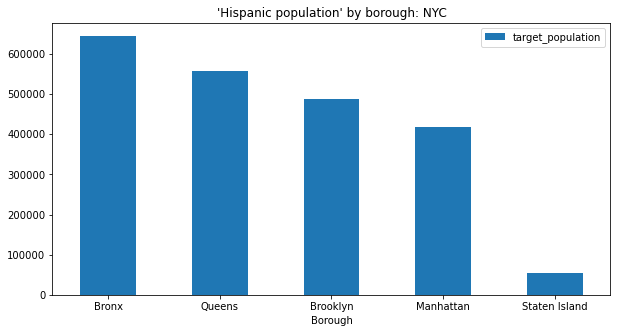

In [11]:
ax = df2.plot.bar(x='Borough', y='target_population', rot=0, title="'Hispanic population' by borough: NYC", figsize=(10,5), legend=True, sort_columns=True ) 

## Let's get data for neighbourhoods and borough from NYC data source
First I look in the web browser at https://cocl.us/new_york_dataset and can see it is a JSON file.

I can use the function we defined previously to process the JSON file and retrieve the data

In [11]:
url='https://cocl.us/new_york_dataset'
ny_data = get_new_york_data(url)
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Let's see how many rows we have in the dataset

In [12]:
ny_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York.  

## Initial Data Analysis

Now let's analyze our initial data. 

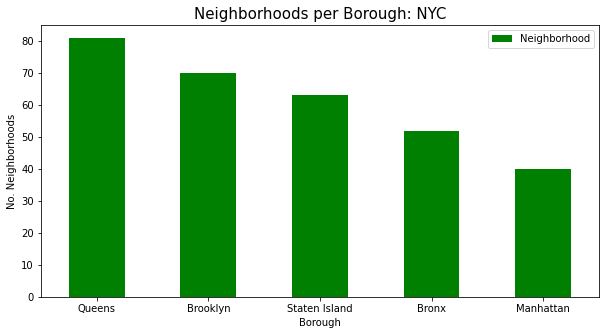

In [13]:
clr = "green"

# Count number of neighbourhoods per borough and sort by number to make the chart easier to read
ny_data.groupby('Borough')['Neighborhood'].count().sort_values(ascending=False).plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Let's analyze further and use Fourthsquare to see how many Mexican restaurants there are in each neighborhood and borough. 

# NOTE: Fourthsquare has a limit of 950 API calls for standard API, which this is so we should be OK

In [14]:
# prepare neighborhood list that contains Mexican restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mex_rest_nyc=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mex_restaurants=venues[venues['Category']=='Mexican Restaurant']   
#    print('(',count,'/',len(ny_data),')','Mexican Restaurants in '+Neighborhood+', '+Borough+':'+str(len(mex_restaurants)))
#    print(row)
    for restaurant_detail in mex_restaurants.values.tolist():
        id, name , category=restaurant_detail
        mex_rest_nyc = mex_rest_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

In [15]:
mex_rest_nyc.to_csv('mex_rest_nyc.csv') # Save the information so far to a .csv file due to limited calls on FourSquare 

In [16]:
mex_rest_nyc = pd.read_csv('mex_rest_nyc.csv')
mex_rest_nyc = mex_rest_nyc.drop(columns=["Unnamed: 0"])
mex_rest_nyc.tail()

,Borough,Neighborhood,ID,Name
122,Brooklyn,Dumbo,4f69f2b76d86f87117bb13ab,Gran Eléctrica
123,Brooklyn,Homecrest,507e08fae4b0998ce3421276,El Mexicano Restaurante & Cafe Inc
124,Brooklyn,Homecrest,4a3ada26f964a5205fa01fe3,La Villita Mexican Restaurant
125,Bronx,Allerton,509d404d498efdffc5ff1315,Tulcimex
126,Bronx,Kingsbridge Heights,4b403740f964a520e8b625e3,Montezuma Mexican Restaurant


In [17]:
mex_rest_nyc.shape

(127, 4)

We got 127 Mexican Restaurants across the New York City. 

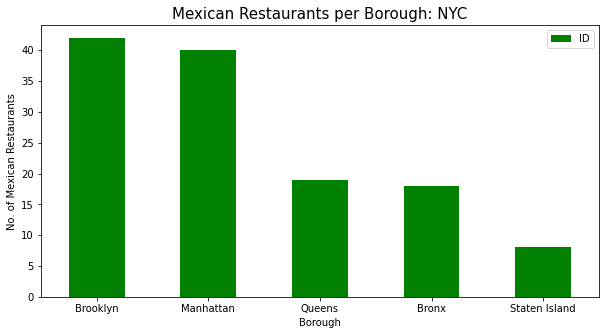

In [18]:
mex_rest_nyc.groupby('Borough')['ID'].count().sort_values(ascending=False).plot.bar(figsize=(10,5), color=clr)
plt.title('Mexican Restaurants per Borough: NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. of Mexican Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

We can also see that Manhattan and Brooklyn have the highest number of Mexcian restaurants, although Manhattan have the least number of neighbourhoods.
To our surpise Queens that have the highest number of hispanic population and percentage, does only have 16 or 17 Mexican restaurants.

So perhaps the hispanic population is more skewed towards other latin cusine preference like Puerta rican or dominican food, but we will leave that outside the scope of this project.

Let's check how many restaurants the top 15 neighborhoods have

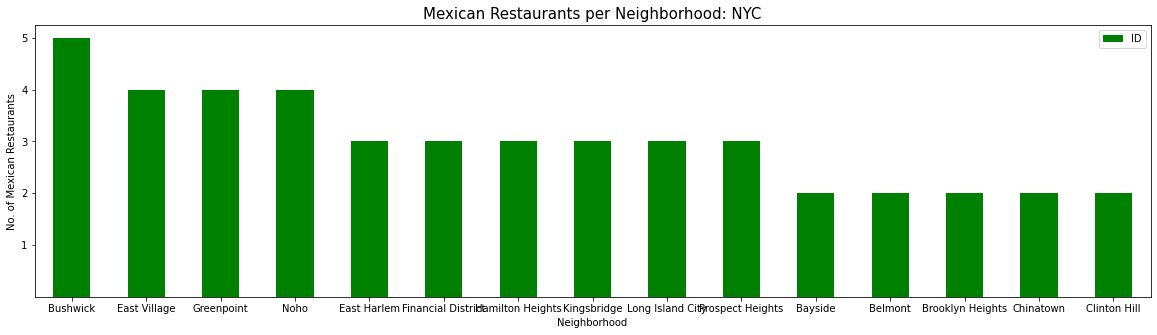

In [19]:
NOofNeigh = 15
mex_rest_nyc.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,5), color=clr)
plt.title('Mexican Restaurants per Neighborhood: NYC', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 10)
plt.ylabel('No. of Mexican Restaurants', fontsize=10)
plt.xticks(rotation = 'horizontal')
plt.yticks([1,2,3,4,5])
plt.legend()
plt.show()

## We can see that no neighbourhood really stands out.
- Bushwich and Greenpoint are in Brooklyn
- East Village and Noho are in Manhattan and next to each other

## Let's us investigate Bushwick further 

In [20]:
mex_bushwick = mex_rest_nyc[mex_rest_nyc['Neighborhood']=='Bushwick'].sort_values(by=['Name'])
mex_bushwick

,Borough,Neighborhood,ID,Name
29,Brooklyn,Bushwick,54a5a765498e6b7e2ce128c8,El Kucho
30,Brooklyn,Bushwick,4a79c17ef964a52093e71fe3,El Sol de Cholula
28,Brooklyn,Bushwick,507c9d44e4b07390823b8d98,Taqueria Sofia
32,Brooklyn,Bushwick,49d7cb08f964a520625d1fe3,Zefe's
31,Brooklyn,Bushwick,4dd6d110814d85e931ff48e4,Zefe's Mexican Restaurant


## Let's us investigate Manhattan further 

In [21]:
mex_manhattan = mex_rest_nyc[mex_rest_nyc['Borough']=='Manhattan'].sort_values(by=['Neighborhood'])
mex_manhattan

,Borough,Neighborhood,ID,Name
81,Manhattan,Battery Park City,52e2f72a498e1de9bce745b0,El Vez
51,Manhattan,Chinatown,5885471a0037eb3b6c2973d2,Factory Tamal
52,Manhattan,Chinatown,58f55261419a9e48f4dd0706,JaJaJa Plantas Mexicana
63,Manhattan,East Harlem,4ed825e98231efe38cad7306,El Aguila
62,Manhattan,East Harlem,53892262498ef00115e1cb9d,Lupita's Restaurant
61,Manhattan,East Harlem,5221402b11d2f5e7ec7c37e8,Cascolate Latin Bistro
73,Manhattan,East Village,544153df498e8f7dae118d8e,Empellón Al Pastor
72,Manhattan,East Village,4d322023c75a6ea8cc220bae,El Camion Cantina
71,Manhattan,East Village,49e80026f964a52037651fe3,Zaragoza Mexican Deli-Grocery
70,Manhattan,East Village,5209469f11d2d4f85e5b7427,Tacos Cuautla Morelos


In [48]:
mex_manhattan

,Borough,Neighborhood,ID,Name
81,Manhattan,Battery Park City,52e2f72a498e1de9bce745b0,El Vez
51,Manhattan,Chinatown,5885471a0037eb3b6c2973d2,Factory Tamal
52,Manhattan,Chinatown,58f55261419a9e48f4dd0706,JaJaJa Plantas Mexicana
63,Manhattan,East Harlem,4ed825e98231efe38cad7306,El Aguila
62,Manhattan,East Harlem,53892262498ef00115e1cb9d,Lupita's Restaurant
61,Manhattan,East Harlem,5221402b11d2f5e7ec7c37e8,Cascolate Latin Bistro
73,Manhattan,East Village,544153df498e8f7dae118d8e,Empellón Al Pastor
72,Manhattan,East Village,4d322023c75a6ea8cc220bae,El Camion Cantina
71,Manhattan,East Village,49e80026f964a52037651fe3,Zaragoza Mexican Deli-Grocery
70,Manhattan,East Village,5209469f11d2d4f85e5b7427,Tacos Cuautla Morelos


## Let's us investigate Brooklyn further 

In [22]:
mex_brooklyn = mex_rest_nyc[mex_rest_nyc['Borough']=='Brooklyn'].sort_values(by=['Name'])
mex_brooklyn

,Borough,Neighborhood,ID,Name
42,Brooklyn,Ocean Hill,5c2ebc4b60255e002ce8a235,Abuela Antonia
46,Brooklyn,East Williamsburg,48260007f964a5209e4f1fe3,Cafe Los Arcos
38,Brooklyn,Clinton Hill,42829c80f964a52053221fe3,Castros
48,Brooklyn,South Side,51c4c6de498edf95246e0072,Cerveceria Havemeyer
34,Brooklyn,Brooklyn Heights,53dd1f41498efb39049ce081,Chipotle Mexican Grill
36,Brooklyn,Park Slope,57781fab498ee216fb58a39c,Chipotle Mexican Grill
44,Brooklyn,Georgetown,5c26849c64c8e1003979056d,Chipotle Mexican Grill
40,Brooklyn,Downtown,5c436d760d8a0f0039eb3f78,Chipotle Mexican Grill
41,Brooklyn,Downtown,4ad4a7c0f964a52085e820e3,Chipotle Mexican Grill
26,Brooklyn,Prospect Heights,53361829498eb42538181b8d,Citrico


### Let's get the ranking of each restaurant from Fourthsquare

# NOTE: This is a premium API call and Fourthsquare has a limitation of 50 calls per day, so our results will be capped at 50 venues !!!!!

In [23]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
mex_rest_stats_nyc=pd.DataFrame(columns=column_names)
count=1
for row in mex_rest_nyc.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(mex_rest_nyc),')','processed')
    mex_rest_stats_nyc = mex_rest_stats_nyc.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
#mex_rest_stats_nyc.tail()

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '60109e7b5428e13b7606188c'}, 'response': {}}


KeyError: 'venue'

In [ ]:
mex_rest_stats_nyc.to_csv('mex_rest_stats_nyc.csv') # As I move through this project I continue to save data to a .csv file 

In [24]:
mex_rest_stats_nyc = pd.read_csv('mex_rest_stats_nyc.csv')
mex_rest_stats_nyc.tail()

,Unnamed: 0,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
40,45,Brooklyn,East Williamsburg,4a12167ef964a52073771fe3,New Mexico Place,39.0,7.3,24.0
41,46,Brooklyn,East Williamsburg,48260007f964a5209e4f1fe3,Cafe Los Arcos,16.0,6.2,21.0
42,47,Brooklyn,North Side,5db7884023aa41000849fc46,Tacombi,26.0,8.4,6.0
43,48,Brooklyn,South Side,51c4c6de498edf95246e0072,Cerveceria Havemeyer,179.0,8.1,54.0
44,49,Brooklyn,South Side,430d0a00f964a5203d271fe3,Taco Chulo,209.0,7.9,88.0


In [28]:
mex_rest_stats_nyc.head(100)

,Unnamed: 0,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,0,Bronx,Kingsbridge,5217dd2811d2d06ccafb77d3,Estrellita Poblana V,24.0,8.1,8.0
1,1,Bronx,Kingsbridge,553d5376498e322eb4d37a1b,Chipotle Mexican Grill,31.0,7.7,1.0
2,2,Bronx,Kingsbridge,4ce81d330f196dcb5d2b43ae,Picante Picante Mexican Restaurant,19.0,7.7,13.0
3,3,Bronx,Bedford Park,4bab9998f964a520c8b73ae3,OK Mr. Pancho,6.0,7.1,4.0
4,4,Bronx,Melrose,5591837d498ee4167d48bb73,Cinco de Mayo,8.0,6.9,3.0
5,6,Bronx,Parkchester,4b4929d2f964a520656826e3,Taqueria Tlaxcali,131.0,9.1,73.0
6,7,Bronx,Westchester Square,4b720280f964a520d9692de3,Estrellita Poblana IV,46.0,8.6,29.0
7,8,Bronx,Westchester Square,5e7dc30676db98000832f0d6,Chipotle Mexican Grill,0.0,7.5,0.0
8,9,Bronx,Belmont,4c27e5e0fe6e2d7f4f84523c,Estrellita Poblana,66.0,8.2,37.0
9,10,Bronx,Belmont,5529d964498ec65bfc27ad91,Chipotle Mexican Grill,24.0,6.4,5.0


### We can see that some restaurants does not have a name or any rating, so let's drop them

In [29]:
#mex_rest_stats_nyc = mex_rest_stats_nyc.drop(42)
#mex_rest_stats_nyc = mex_rest_stats_nyc.drop(37)
#mex_rest_stats_nyc = mex_rest_stats_nyc.drop(32)
#mex_rest_stats_nyc = mex_rest_stats_nyc.drop(12)
#mex_rest_stats_nyc = mex_rest_stats_nyc.drop(5)

In [37]:
del mex_rest_stats_nyc["Unnamed: 0"]
mex_rest_stats_nyc.sort_values(by=["Name"])

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
41,Brooklyn,East Williamsburg,48260007f964a5209e4f1fe3,Cafe Los Arcos,16.0,6.2,21.0
10,Bronx,North Riverdale,4ba174d5f964a52094b837e3,Carlos & Gabby's - Riverdale,9.0,6.5,8.0
34,Brooklyn,Clinton Hill,42829c80f964a52053221fe3,Castros,56.0,7.9,43.0
43,Brooklyn,South Side,51c4c6de498edf95246e0072,Cerveceria Havemeyer,179.0,8.1,54.0
1,Bronx,Kingsbridge,553d5376498e322eb4d37a1b,Chipotle Mexican Grill,31.0,7.7,1.0
39,Brooklyn,Georgetown,5c26849c64c8e1003979056d,Chipotle Mexican Grill,2.0,7.6,0.0
37,Brooklyn,Downtown,4ad4a7c0f964a52085e820e3,Chipotle Mexican Grill,174.0,6.6,78.0
7,Bronx,Westchester Square,5e7dc30676db98000832f0d6,Chipotle Mexican Grill,0.0,7.5,0.0
9,Bronx,Belmont,5529d964498ec65bfc27ad91,Chipotle Mexican Grill,24.0,6.4,5.0
36,Brooklyn,Downtown,5c436d760d8a0f0039eb3f78,Chipotle Mexican Grill,2.0,7.6,0.0


In [116]:
mex_rest_stats_nyc.shape

(45, 7)

We got statistics for ONLY 45 Mexican Restaurants in New York city. 

This is the 50 limit of Fourthdquare premium API calls in sandbox :-(

Let's check what values we have in our DataFrame

In [47]:
mex_rest_stats_nyc.groupby('Borough')['Tips'].mean().sort_values(ascending=False)

Borough
Brooklyn    23.939394
Bronx       15.333333
Name: Tips, dtype: float64

In [45]:
mex_rest_stats_nyc.groupby('Neighborhood')['Likes'].mean().sort_values(ascending=False)

Neighborhood
South Side             194.000000
Parkchester            131.000000
Greenpoint              97.000000
Downtown                88.000000
Sunset Park             84.500000
Prospect Heights        81.666667
Clinton Hill            46.000000
Belmont                 45.000000
Windsor Terrace         40.000000
Brooklyn Heights        37.500000
Bushwick                36.750000
East Williamsburg       27.500000
North Side              26.000000
Kingsbridge             24.666667
Westchester Square      23.000000
Bay Ridge               19.000000
Flatbush                17.000000
Park Slope              15.000000
Prospect Park South     12.000000
North Riverdale          9.000000
Melrose                  8.000000
Bedford Park             6.000000
Kensington               5.000000
Schuylerville            5.000000
Georgetown               2.000000
Name: Likes, dtype: float64

In [30]:
mex_rest_stats_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    45 non-null     int64  
 1   Borough       45 non-null     object 
 2   Neighborhood  45 non-null     object 
 3   ID            45 non-null     object 
 4   Name          45 non-null     object 
 5   Likes         45 non-null     float64
 6   Rating        45 non-null     float64
 7   Tips          45 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ KB


We can observe that the string values like Likes, Tips should be converted into float

In [31]:
mex_rest_stats_nyc['Likes'] = mex_rest_stats_nyc['Likes'].astype('float64')
mex_rest_stats_nyc['Tips'] = mex_rest_stats_nyc['Tips'].astype('float64')
mex_rest_stats_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    45 non-null     int64  
 1   Borough       45 non-null     object 
 2   Neighborhood  45 non-null     object 
 3   ID            45 non-null     object 
 4   Name          45 non-null     object 
 5   Likes         45 non-null     float64
 6   Rating        45 non-null     float64
 7   Tips          45 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ KB


In [49]:
mex_rest_stats_nyc.sort_values("Name", ascending=True)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
41,Brooklyn,East Williamsburg,48260007f964a5209e4f1fe3,Cafe Los Arcos,16.0,6.2,21.0
10,Bronx,North Riverdale,4ba174d5f964a52094b837e3,Carlos & Gabby's - Riverdale,9.0,6.5,8.0
34,Brooklyn,Clinton Hill,42829c80f964a52053221fe3,Castros,56.0,7.9,43.0
43,Brooklyn,South Side,51c4c6de498edf95246e0072,Cerveceria Havemeyer,179.0,8.1,54.0
1,Bronx,Kingsbridge,553d5376498e322eb4d37a1b,Chipotle Mexican Grill,31.0,7.7,1.0
39,Brooklyn,Georgetown,5c26849c64c8e1003979056d,Chipotle Mexican Grill,2.0,7.6,0.0
37,Brooklyn,Downtown,4ad4a7c0f964a52085e820e3,Chipotle Mexican Grill,174.0,6.6,78.0
7,Bronx,Westchester Square,5e7dc30676db98000832f0d6,Chipotle Mexican Grill,0.0,7.5,0.0
9,Bronx,Belmont,5529d964498ec65bfc27ad91,Chipotle Mexican Grill,24.0,6.4,5.0
36,Brooklyn,Downtown,5c436d760d8a0f0039eb3f78,Chipotle Mexican Grill,2.0,7.6,0.0


### We can see that the Chipotle restaurants do no get very high ratings

In [50]:
mex_rest_stats_nyc.sort_values("Rating", ascending=True)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
18,Brooklyn,Greenpoint,4ab6b093f964a520947820e3,Yummy Taco,4.0,5.8,6.0
41,Brooklyn,East Williamsburg,48260007f964a5209e4f1fe3,Cafe Los Arcos,16.0,6.2,21.0
9,Bronx,Belmont,5529d964498ec65bfc27ad91,Chipotle Mexican Grill,24.0,6.4,5.0
35,Brooklyn,Clinton Hill,4ba4e92ef964a5200bc238e3,Los Pollitos III,36.0,6.5,33.0
10,Bronx,North Riverdale,4ba174d5f964a52094b837e3,Carlos & Gabby's - Riverdale,9.0,6.5,8.0
37,Brooklyn,Downtown,4ad4a7c0f964a52085e820e3,Chipotle Mexican Grill,174.0,6.6,78.0
22,Brooklyn,Windsor Terrace,4a47af4cf964a520f4a91fe3,Elora's Restaurant,40.0,6.7,36.0
12,Brooklyn,Bay Ridge,5796884c498eef49acc7f06e,Lobo Loco,19.0,6.7,4.0
20,Brooklyn,Flatbush,4b92e166f964a520062434e3,Don Burrito,11.0,6.8,11.0
4,Bronx,Melrose,5591837d498ee4167d48bb73,Cinco de Mayo,8.0,6.9,3.0


In [106]:
mex_rest_stats_nyc.groupby(['Neighborhood']).size()

Neighborhood
Bay Ridge              1
Bedford Park           1
Belmont                2
Brooklyn Heights       2
Bushwick               4
Clinton Hill           2
Downtown               2
East Williamsburg      2
Flatbush               2
Georgetown             1
Greenpoint             4
Kensington             1
Kingsbridge            3
Melrose                1
North Riverdale        1
North Side             1
Park Slope             2
Parkchester            1
Prospect Heights       3
Prospect Park South    1
Schuylerville          1
South Side             2
Sunset Park            2
Westchester Square     2
Windsor Terrace        1
dtype: int64

## Now when the data types look correct, let's continue our analysis.

### Restaurant with most Likes

In [107]:
mex_rest_stats_nyc.loc[mex_rest_stats_nyc['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                  Greenpoint
ID              5ae8ed8eb3c961002b3360da
Name                             Oxomoco
Likes                                250
Rating                                 9
Tips                                  54
Name: 17, dtype: object

### Restaurant with highest Ratings

In [108]:
mex_rest_stats_nyc.loc[mex_rest_stats_nyc['Rating'].idxmax()]

Borough                            Bronx
Neighborhood                 Parkchester
ID              4b4929d2f964a520656826e3
Name                   Taqueria Tlaxcali
Likes                                131
Rating                               9.1
Tips                                  73
Name: 6, dtype: object

### Restaurant with maximum Tips

In [109]:
mex_rest_stats_nyc.loc[mex_rest_stats_nyc['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                  South Side
ID              430d0a00f964a5203d271fe3
Name                          Taco Chulo
Likes                                209
Rating                               7.9
Tips                                  88
Name: 49, dtype: object

## Let's identify and visualize the neighborhood and borough with the maximum average rating of Mexican restaurants

In [51]:
ny_neighborhood_stats=mex_rest_stats_nyc.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(100)

,Neighborhood,Average Rating
17,Parkchester,9.100000
15,North Side,8.400000
23,Westchester Square,8.050000
18,Prospect Heights,8.033333
21,South Side,8.000000
3,Brooklyn Heights,7.950000
4,Bushwick,7.900000
22,Sunset Park,7.850000
12,Kingsbridge,7.833333
11,Kensington,7.800000


### Let's remove all neighborhoods without ratings

In [52]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=0].sort_values(['Average Rating'],ascending=False)
ny_neighborhood_stats.head(100)

,Neighborhood,Average Rating
17,Parkchester,9.100000
15,North Side,8.400000
23,Westchester Square,8.050000
18,Prospect Heights,8.033333
21,South Side,8.000000
3,Brooklyn Heights,7.950000
4,Bushwick,7.900000
22,Sunset Park,7.850000
12,Kingsbridge,7.833333
11,Kensington,7.800000


In [99]:
#ny_borough_stats=mex_rest_stats_nyc.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
#ny_borough_stats2 = mex_rest_stats_nyc.groupby('Borough').mean()['Rating'].sort_values(ascending=False)
#ny_borough_stats2
#ny_borough_stats.columns=['Borough','Average Rating']
#ny_borough_stats.sort_values(['Average Rating'],ascending=False).head(5)

In [53]:
mex_rest_stats_nyc.head(100)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Kingsbridge,5217dd2811d2d06ccafb77d3,Estrellita Poblana V,24.0,8.1,8.0
1,Bronx,Kingsbridge,553d5376498e322eb4d37a1b,Chipotle Mexican Grill,31.0,7.7,1.0
2,Bronx,Kingsbridge,4ce81d330f196dcb5d2b43ae,Picante Picante Mexican Restaurant,19.0,7.7,13.0
3,Bronx,Bedford Park,4bab9998f964a520c8b73ae3,OK Mr. Pancho,6.0,7.1,4.0
4,Bronx,Melrose,5591837d498ee4167d48bb73,Cinco de Mayo,8.0,6.9,3.0
5,Bronx,Parkchester,4b4929d2f964a520656826e3,Taqueria Tlaxcali,131.0,9.1,73.0
6,Bronx,Westchester Square,4b720280f964a520d9692de3,Estrellita Poblana IV,46.0,8.6,29.0
7,Bronx,Westchester Square,5e7dc30676db98000832f0d6,Chipotle Mexican Grill,0.0,7.5,0.0
8,Bronx,Belmont,4c27e5e0fe6e2d7f4f84523c,Estrellita Poblana,66.0,8.2,37.0
9,Bronx,Belmont,5529d964498ec65bfc27ad91,Chipotle Mexican Grill,24.0,6.4,5.0


## Let's visualize the ratings by neighbourhood and borough

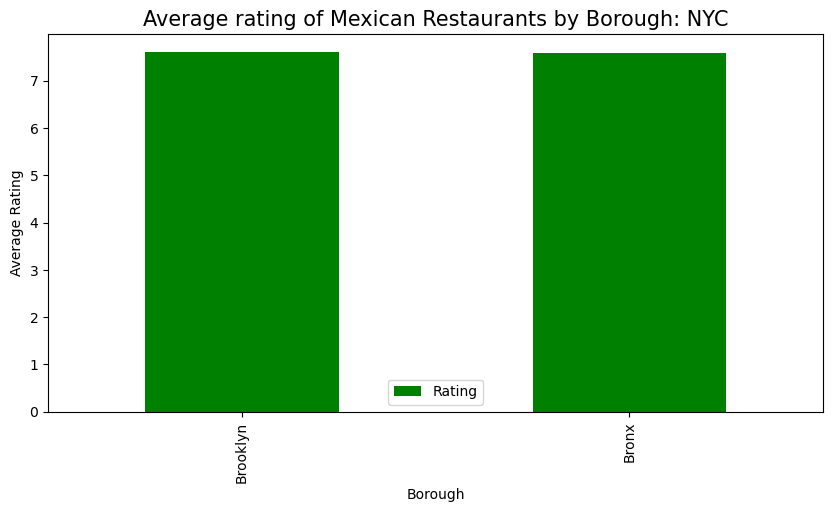

In [54]:
plt.figure(figsize=(10,5), dpi = 100)
plt.title('Average rating of Mexican Restaurants by Borough: NYC', fontsize=15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('Average Rating', fontsize=10)
# Calculate mean and sort to make the graph easier
mex_rest_stats_nyc.groupby('Borough').mean()['Rating'].sort_values(ascending=False).plot(kind='bar', color=clr)
plt.legend()
plt.show()

We will join this Dataset to original New York data to get longitude and latitude

In [55]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats.head(100)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Bronx,Parkchester,40.837938,-73.856003,9.100000
1,Brooklyn,North Side,40.714823,-73.958809,8.400000
2,Bronx,Westchester Square,40.840619,-73.842194,8.050000
3,Brooklyn,Prospect Heights,40.676822,-73.964859,8.033333
4,Brooklyn,South Side,40.710861,-73.958001,8.000000
5,Brooklyn,Brooklyn Heights,40.695864,-73.993782,7.950000
6,Brooklyn,Bushwick,40.698116,-73.925258,7.900000
7,Brooklyn,Sunset Park,40.645103,-74.010316,7.850000
8,Bronx,Kingsbridge,40.881687,-73.902818,7.833333
9,Brooklyn,Kensington,40.642382,-73.980421,7.800000


Now we will show this data on a map

In [56]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=15, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='red',
            fill_opacity=0.5
        )
    )

Let's add a new field to dataframe for labeling purpose

In [57]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Results / Conclusion of where to open a Mexican restaurant in New York City 

### Discussion
From the results and my analysis, I would say that Manhattan and Brooklyn are the best places to eat Mexican food in New York City. To our surprise Bronx does not have many Mexican restaurants, but Bronx has the same average rating as Brooklyn, but lower tips and likes. Both Brooklyn and Manhattan have more x2 the number of restaurants compared with Bronx. Manhattan and Brooklyn have the highest number of Mexican restaurants and Manhattan has the highest rating by a wide margin. Bronx has the lowest rating almost 20% lower rating than Manhattan.
So, this could suggest that a Hispanic population does not equal a taste for Mexican food. Perhaps these people cook at home or prefer or other types of Latin cuisine, e.g. food from Puerto Rico or Dominican Republic.
We could also notice that the chain Chipotle has many restaurants, but that they have an average rating. This would suggest there could be an opening for a real authentic Mexican cuisine to out-compete the chain's restaurants.
One could argue that Manhattan with almost as many Mexican restaurants as Brooklyn and the influx of people working daily in Manhattan, would be the best choice for a Mexican restaurant, but I would rate Brooklyn as the best location to open a Mexican restaurant. Compared to Manhattan, it has a larger total population and a larger Hispanic population and the lower average rating than Manhattan makes it easier competition. We should also consider that Brooklyn real estate prices are much cheaper than Manhattan.

I would argue that both Bushwick and Greenpoint are good locations and both have restaurants with top ratings and with lower ratings so there is room to out compete the poorly rated restaurants.  Greenpoint rates better than Bushwick for Likes and Tips, so that put Greenpoint as the best location to open a Mexican restaurant.
However, I would also recommend to open a genuine, real Mexican restaurant.
Finally, I would go to Oxomoco in Brooklyn for the best Mexican cusine with 9 (event though the best scores 9.1), it has 250 likes.

### Limitations and ideas for further research
First, our data primarily came from Fourthsquare and it has a limitation of 50 premium API calls per day in sandbox, so we were unable to retrieve all data and can question the accuracy of the acquired data. To get better results, we would need more data, e.g. real estate prices, restaurant size, price, profit and citizens buying power and use a Fourthsquare paid account to bypass any limitations.

 
### Conclusions
In this Capstone project, I have followed a data science methodology as taught in the Coursera course, incl. identifying a business problem, analyzing which data source are required, retrieving the data, cleaning it, and performing analysis along with visualizations. And as the last step I have provided a discussion and recommendation for the business problem.
So, our conclusion is that Brooklyn is the best borough and Greenpoint the best neighborhood to open a Mexican restaurant.

